In [131]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier,StackingClassifier
import xgboost as xgb

from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,log_loss,ConfusionMatrixDisplay

import warnings
import joblib

In [4]:
warnings.filterwarnings('ignore')

In [92]:
data = pd.read_csv('Telco-Customer-Churn.csv')

In [93]:
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


# Exploratory Data Analyis (EDA) - Univariate Analysis

In [ ]:
# Identifying the Categorical and Numerical columns to perform EDA

In [94]:
cat_cols = data.drop(columns = ['TotalCharges','customerID']).select_dtypes(object).columns
#cat_cols

In [95]:
data.select_dtypes(int,float).columns

Index(['SeniorCitizen', 'tenure'], dtype='object')

In [96]:
data['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [57]:
# Converted Senior Citizen from Intg to Categorical

In [97]:
data['SeniorCitizen'].replace({0: 'No',1: 'Yes'},inplace = True)

In [98]:
cat_cols = data.drop(columns = ['TotalCharges','customerID']).select_dtypes(object).columns
#cat_cols

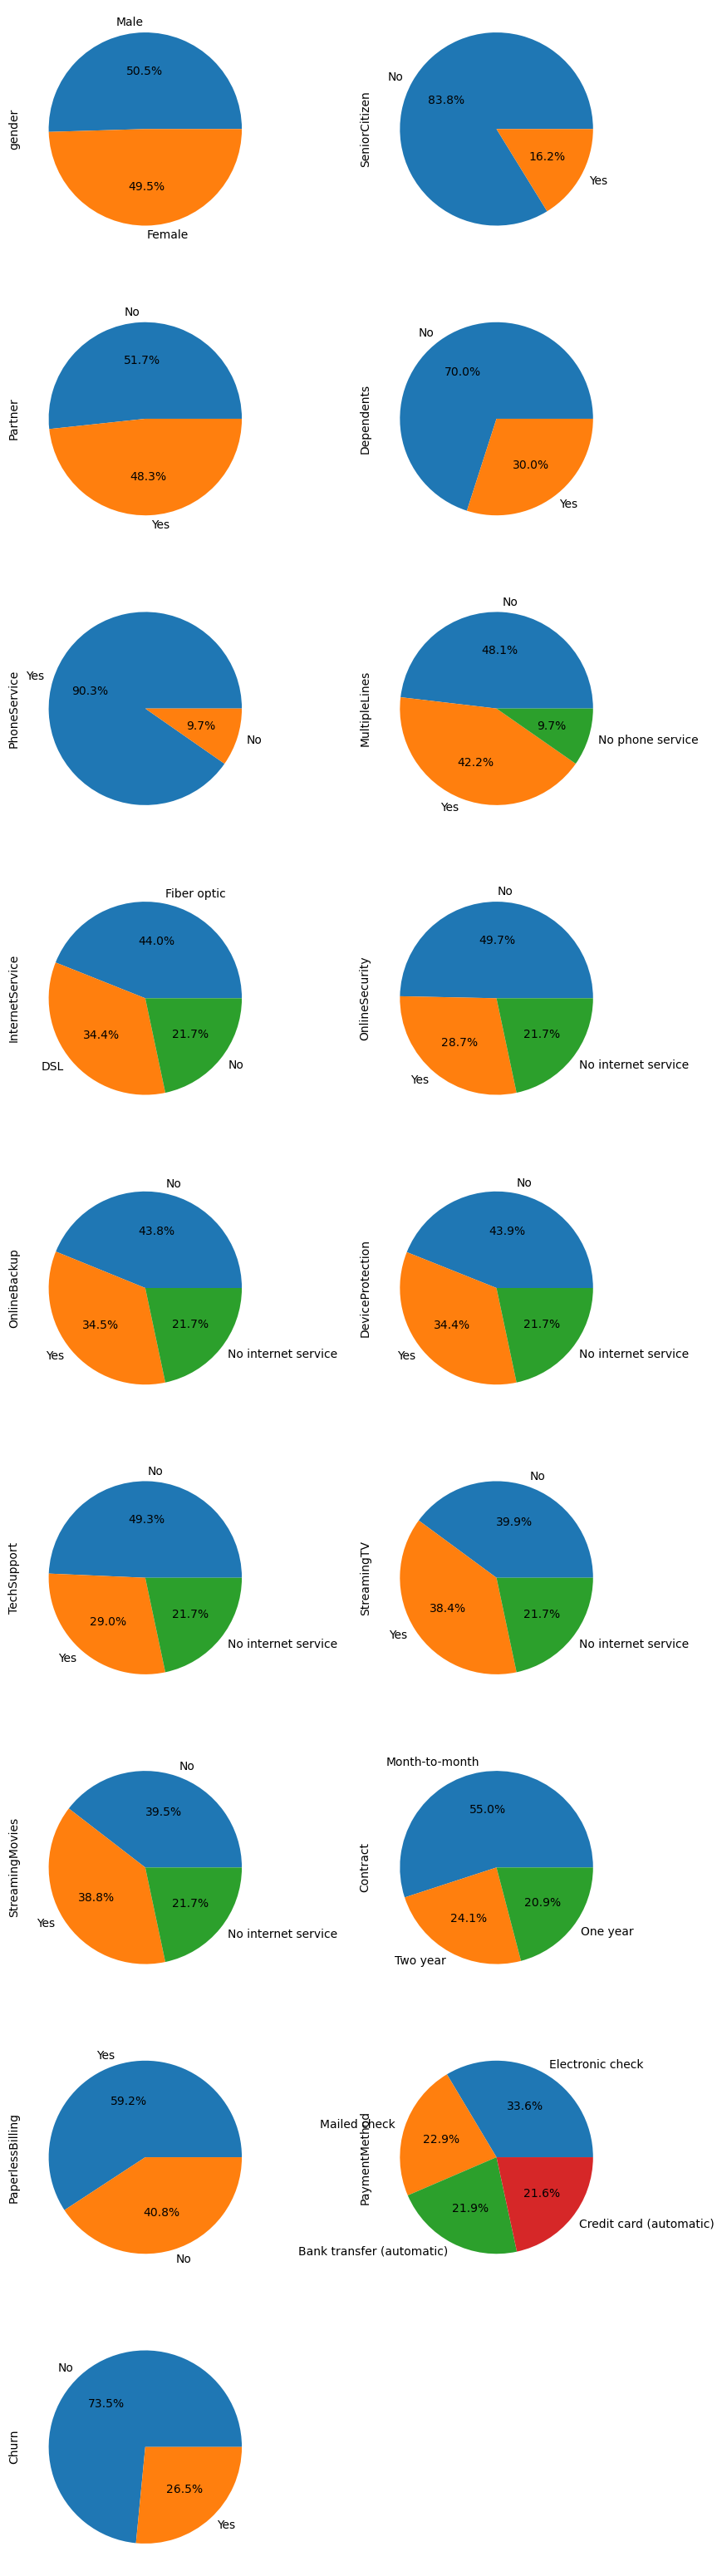

In [67]:
rows = 9
cols = 2
iter= 1
plt.figure(figsize = (10,40))
for i in cat_cols:
  plt.subplot(rows,cols,iter)
  data[i].value_counts().plot.pie(autopct = '%1.1f%%')
  iter+=1

# Exploratory Data Analysis (BiVariate Analysis)

In [86]:

for i in cat_cols:
    if i != 'Churn':
        a = pd.crosstab(data[i],data['Churn'])
    display(a)

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


Churn,No,Yes
SeniorCitizen,,
No,4508,1393
Yes,666,476


Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


Churn,No,Yes
PhoneService,,
No,512,170
Yes,4662,1699


Churn,No,Yes
MultipleLines,,
No,2541,849
No phone service,512,170
Yes,2121,850


Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


Churn,No,Yes
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


Churn,No,Yes
OnlineBackup,,
No,1855,1233
No internet service,1413,113
Yes,1906,523


Churn,No,Yes
DeviceProtection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545


Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


Churn,No,Yes
StreamingTV,,
No,1868,942
No internet service,1413,113
Yes,1893,814


Churn,No,Yes
StreamingMovies,,
No,1847,938
No internet service,1413,113
Yes,1914,818


Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


<Figure size 500x500 with 0 Axes>

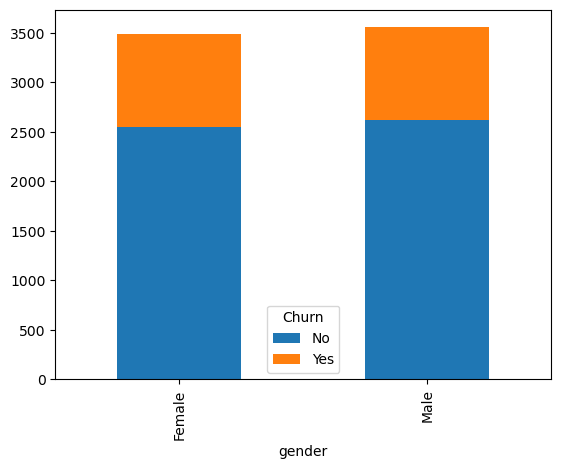

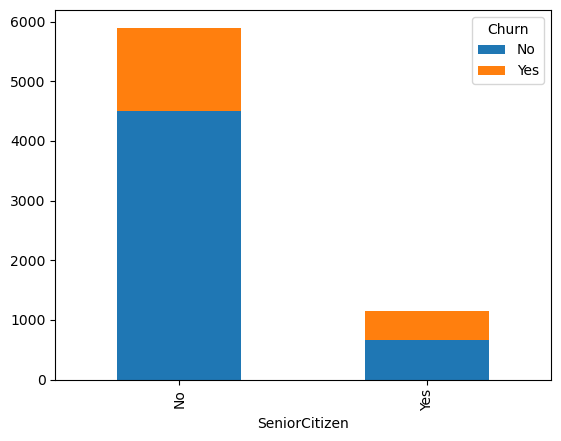

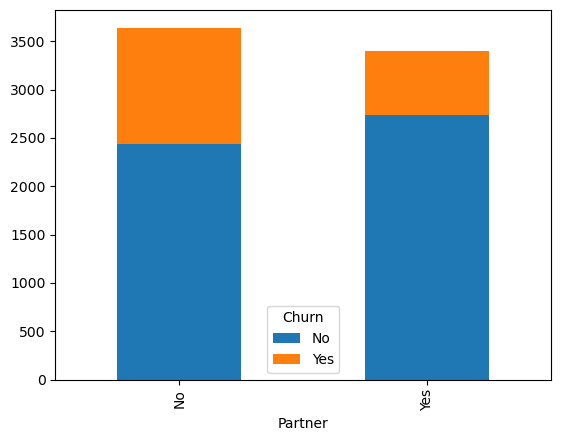

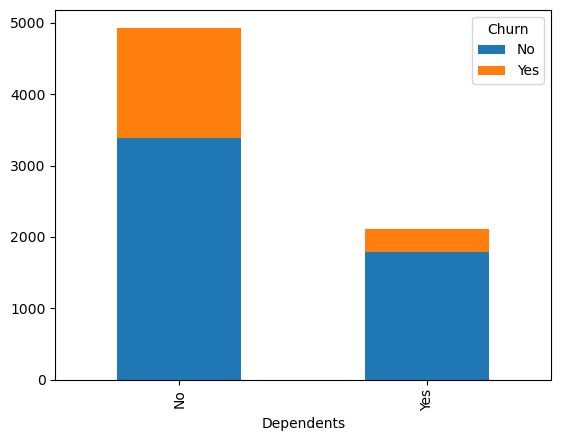

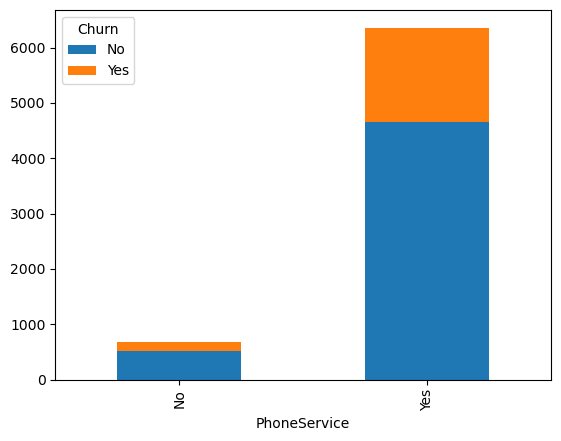

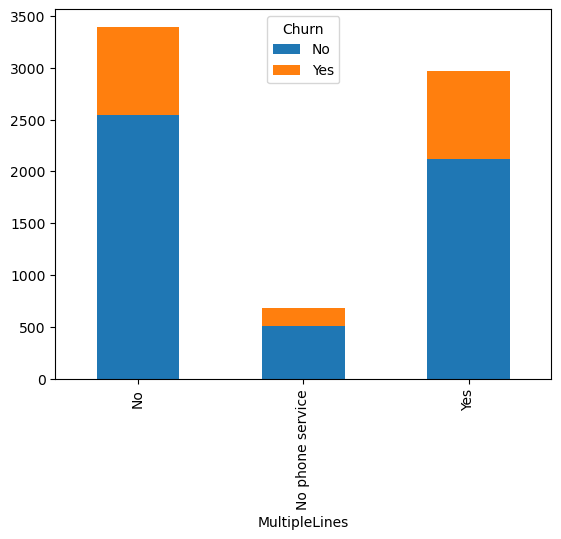

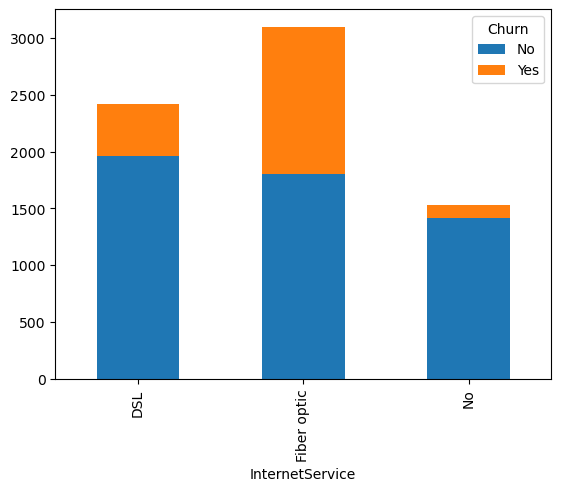

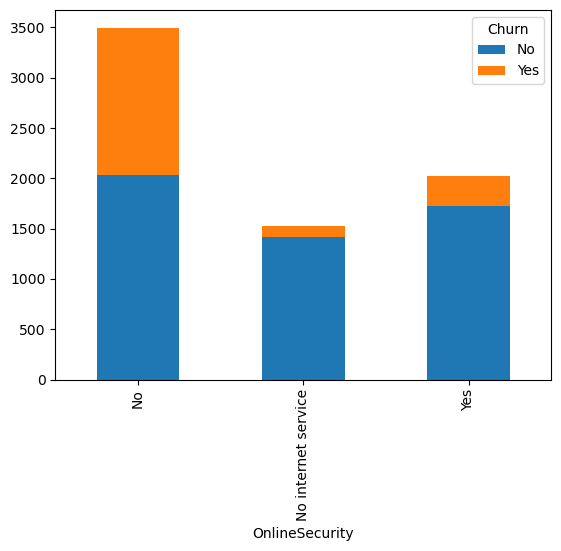

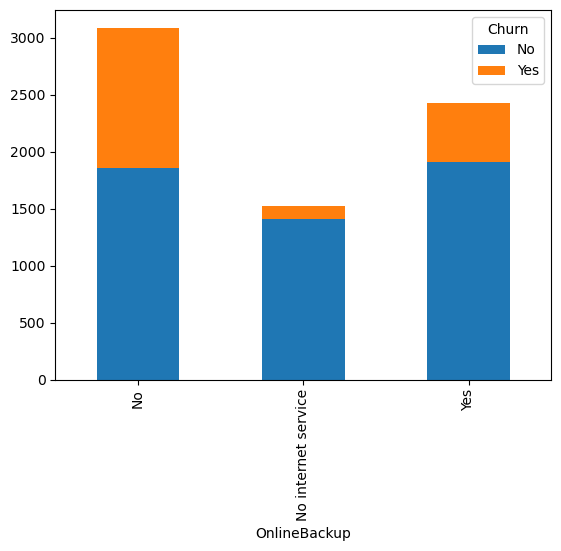

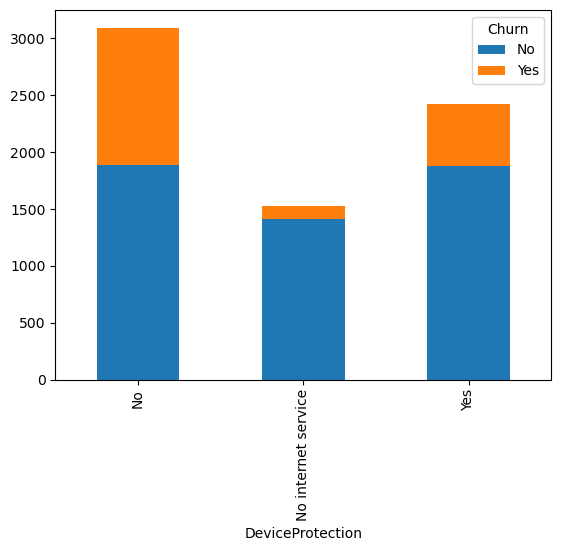

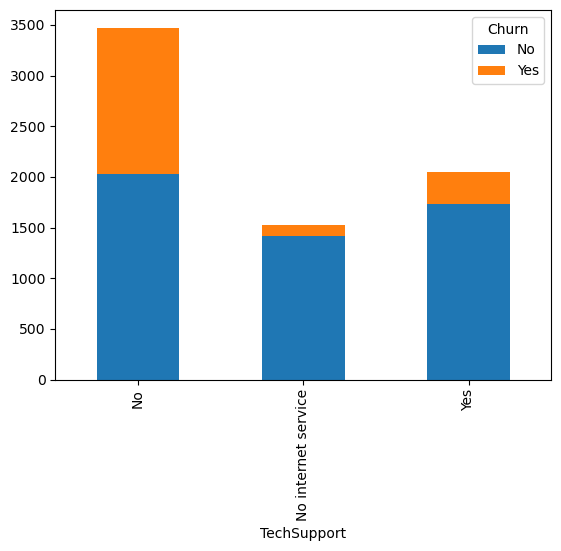

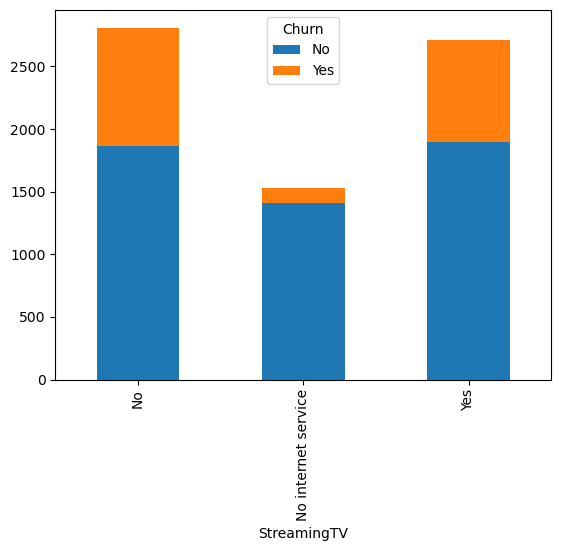

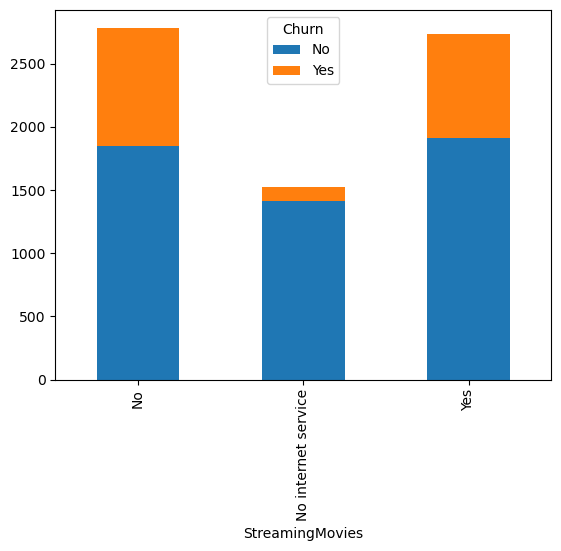

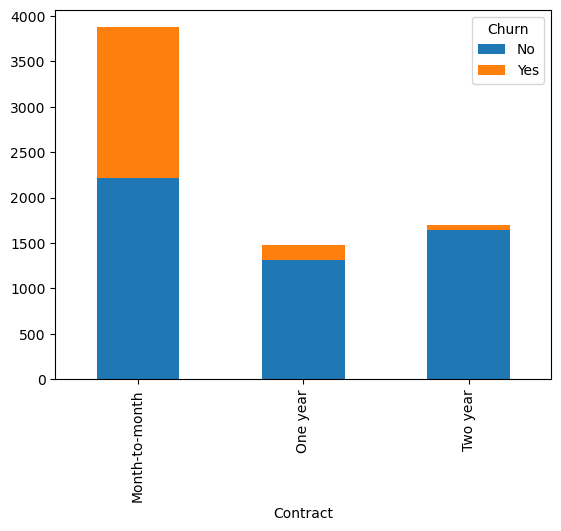

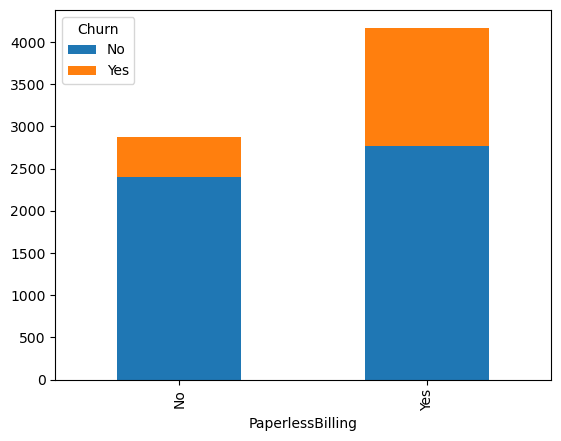

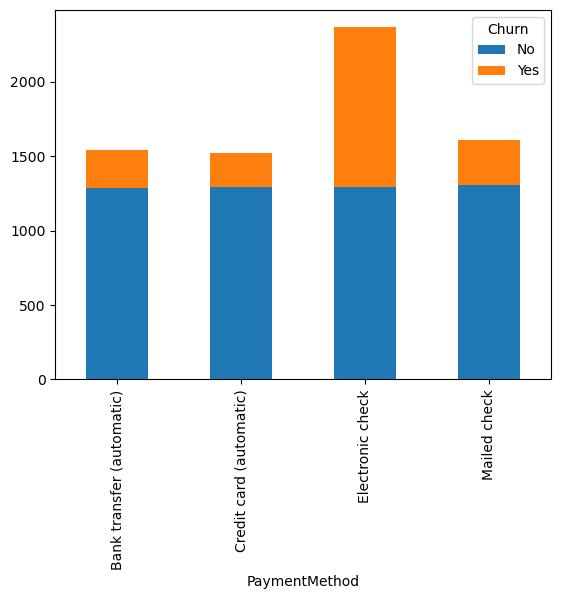

In [70]:
plt.figure(figsize=(10,30))

for i in cat_cols:
    if i != 'Churn':
        cross = pd.crosstab(data[i],data['Churn'])
        cross.div(cross.sum(1),axis = 0).plot(kind = 'bar',stacked = True)
        

In [72]:
data.corr()

,tenure,MonthlyCharges
tenure,1.0000,0.2479
MonthlyCharges,0.2479,1.0000


<Axes: >

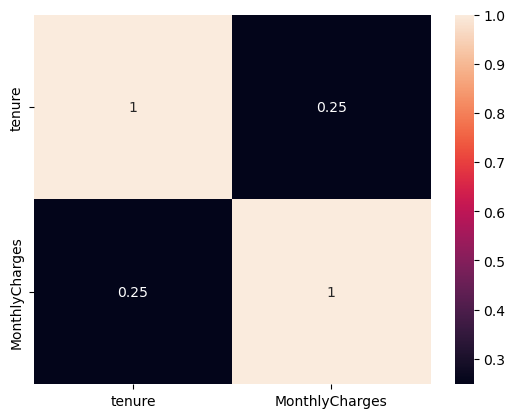

In [71]:
sns.heatmap(data.corr(),annot=True)

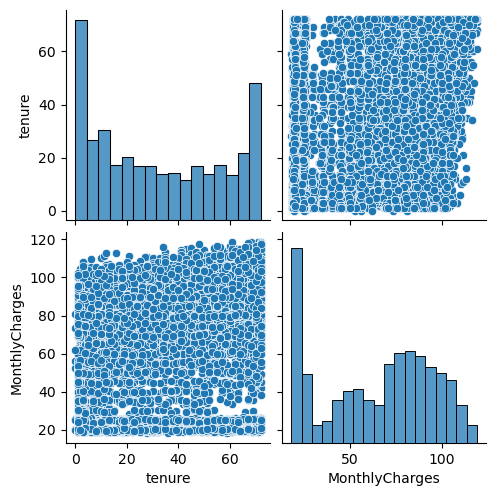

In [68]:
sns.pairplot(data)

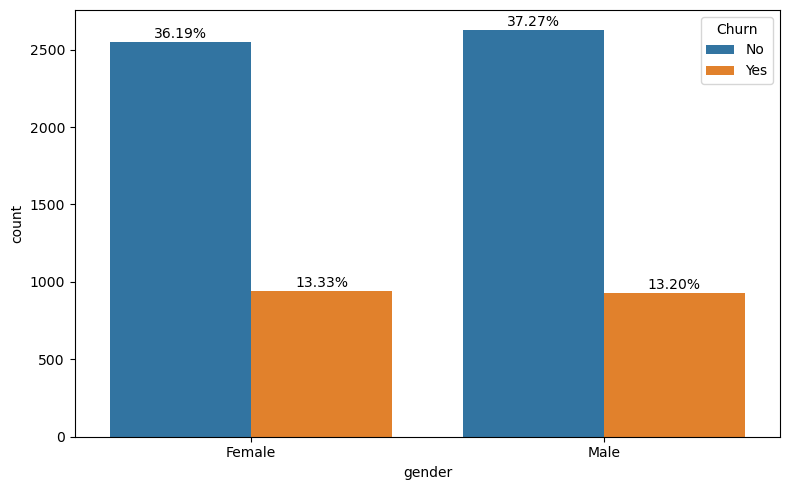

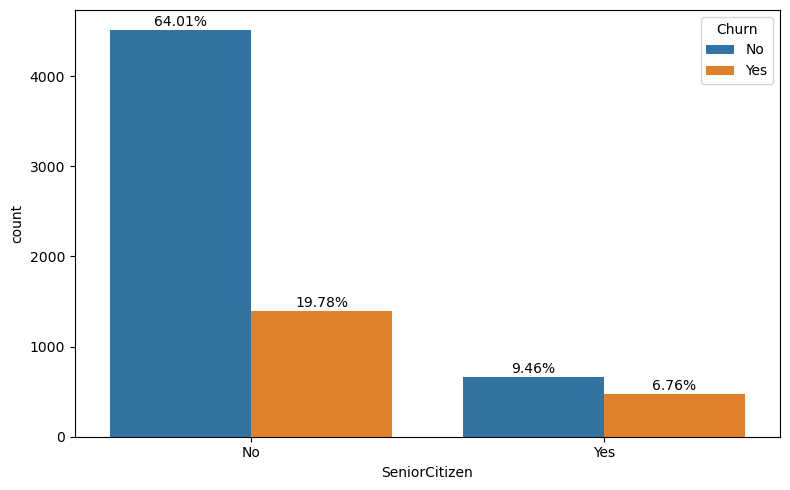

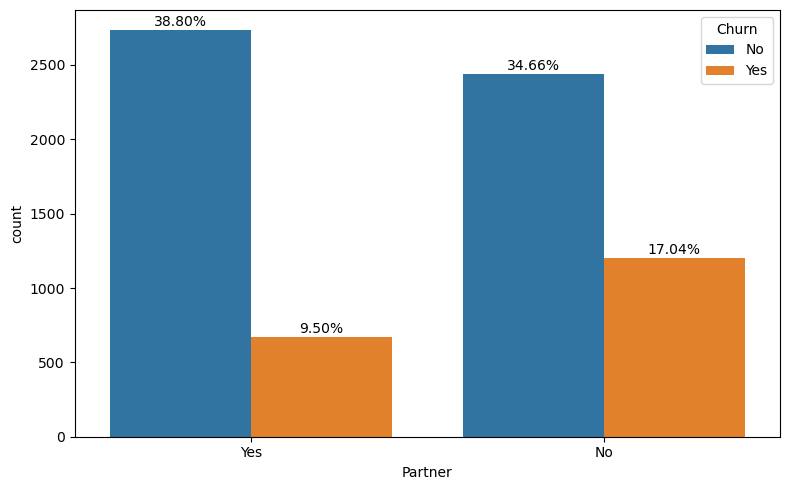

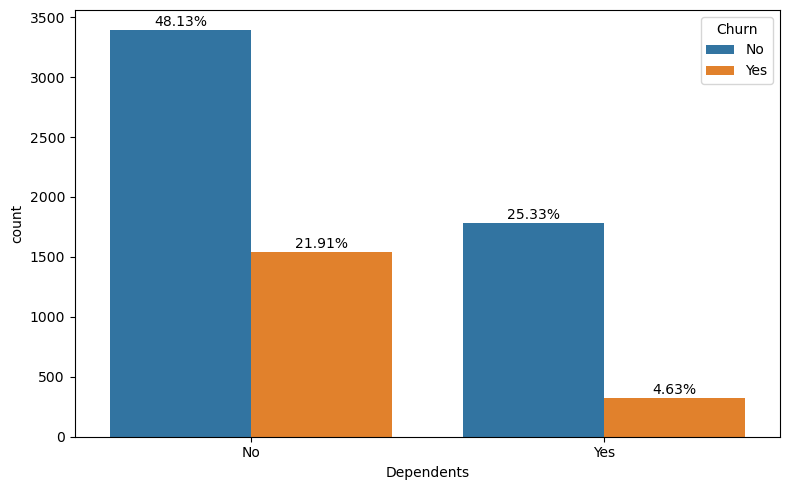

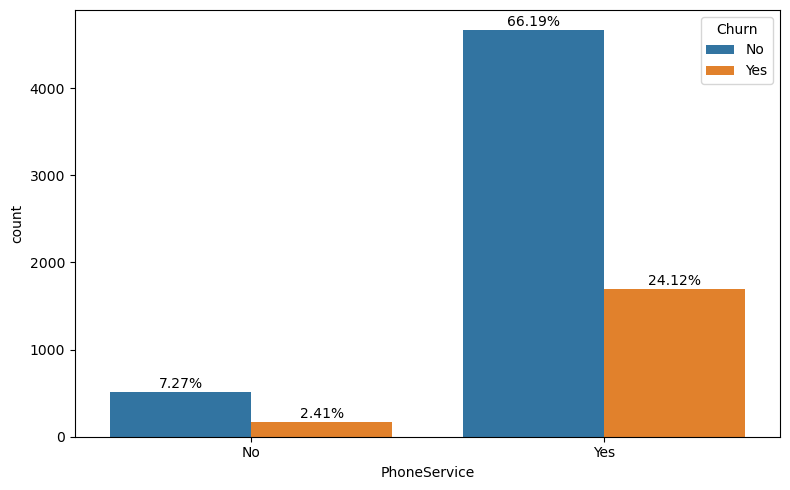

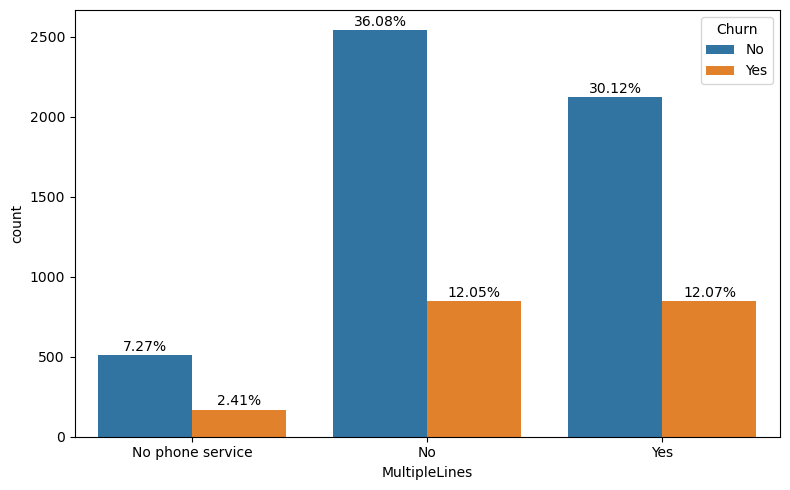

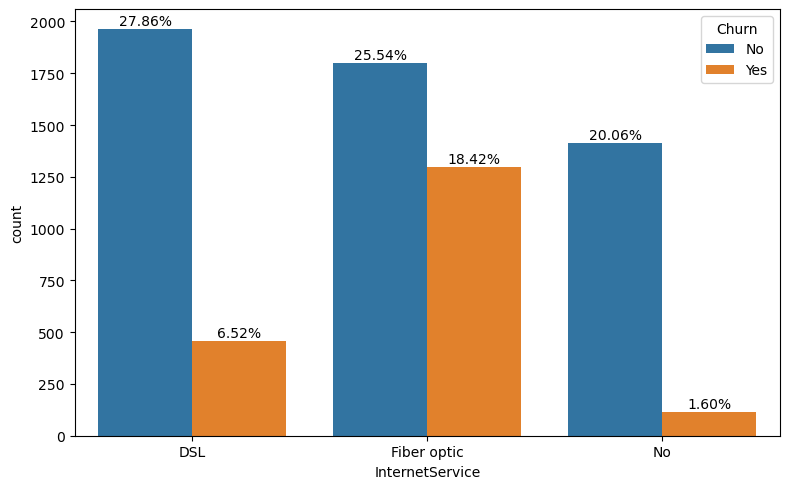

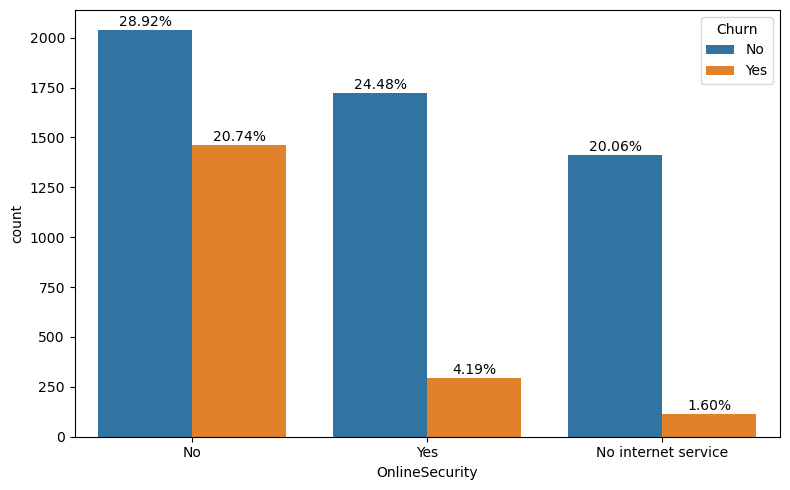

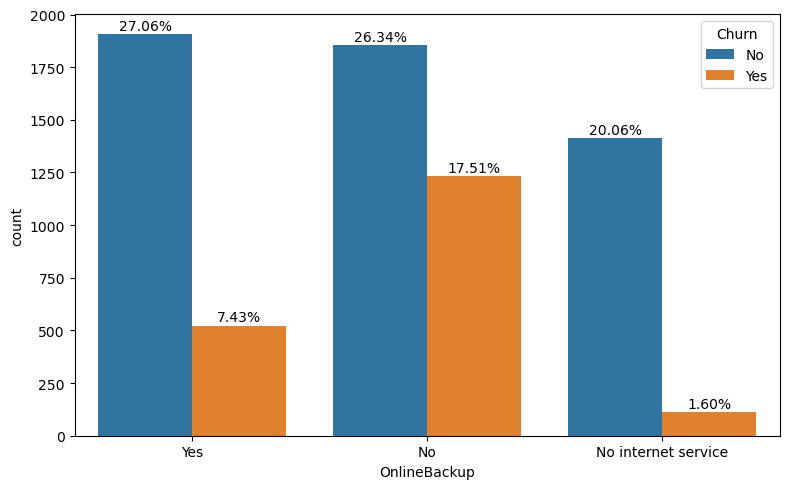

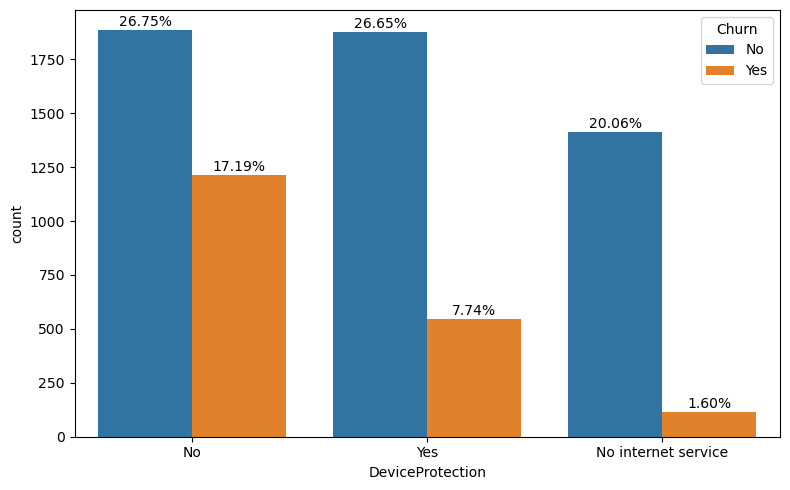

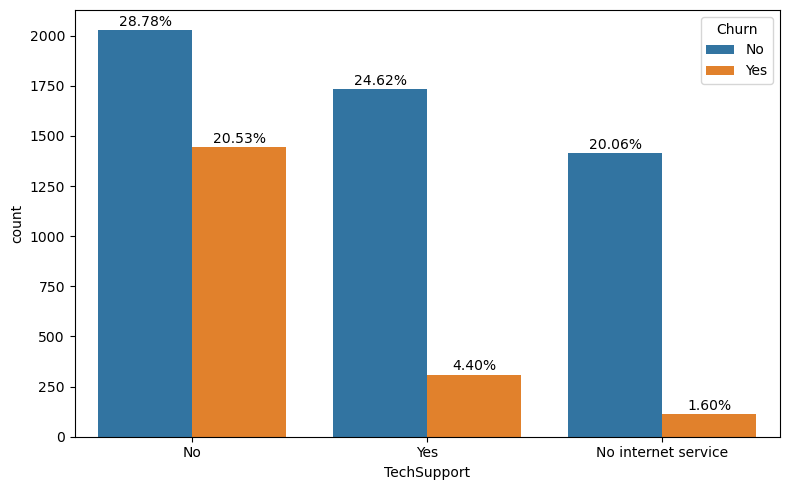

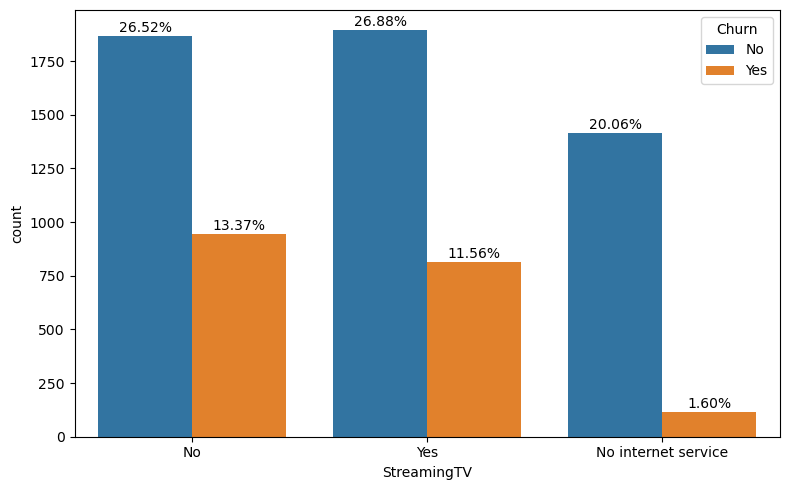

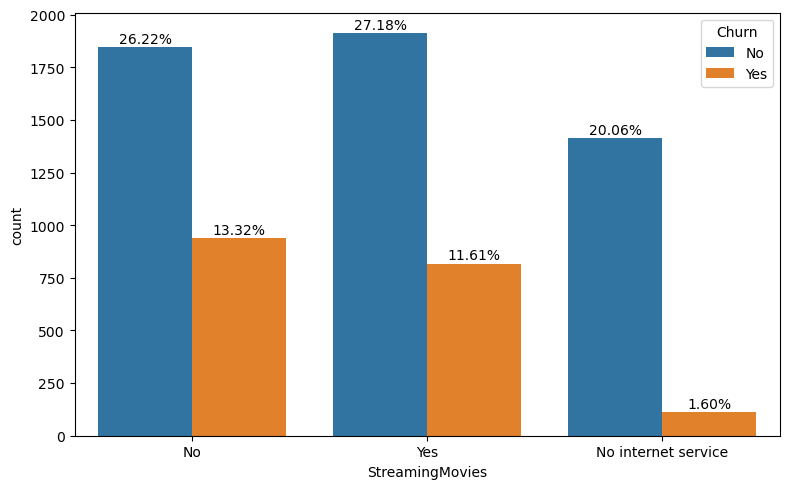

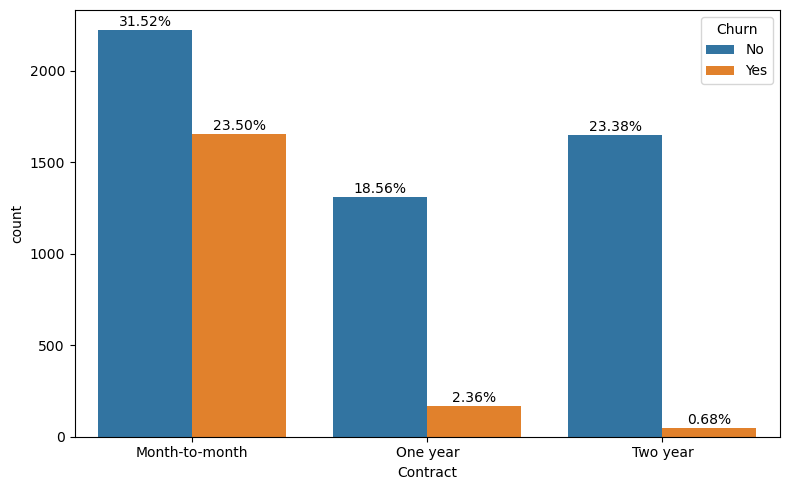

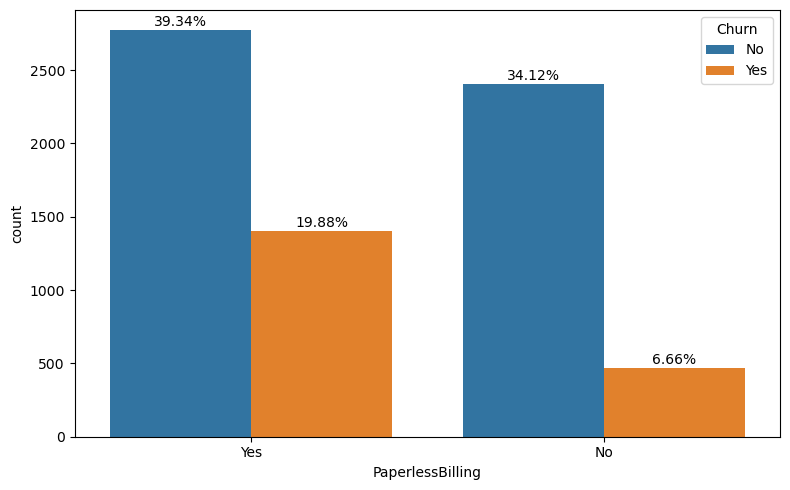

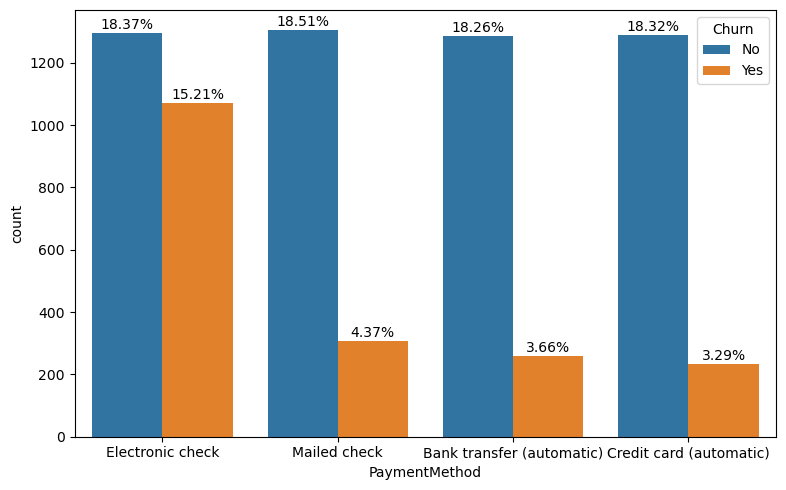

In [89]:
for i in cat_cols:
    if i != 'Churn':
        plt.figure(figsize=(8, 5))
        resp_count = sns.countplot(x=i, hue = 'Churn', data=data)
        #plt.title('Value Counts on",i,"with Response Hue')
        total = len(data)
        for p in resp_count.patches:
            percentage = f'{100 * p.get_height() / total:.2f}%\n'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            resp_count.annotate(percentage, (x, y), ha='center', va='center')
        plt.tight_layout()
        plt.show()

# Business Insights :
----------------------------------

Out of the total sample drawn for analysis, 26.5% of the customers have churn out in last 38months.
Out of 26.5% customers who have churned are :
	- 13.33% Female & 13.20% Male
	- 17.04% doesn't have partner & 9.50% has partner
	- 21.91% has dependents & 4.63% has no dependents
	- 19.78% are not senior citizens & 6.76% are senior citizens
	- 24.12% have phone service & 2.41% don't have phone service
	- 12.07% has multiple Lines, 12.05% doesn't have multiple Lines,& 2.41% don't have phone service
	- 18.42% has FiberOptic cable, 6.52 has DSL Internet service, & 1.60 % has no Internet
	- 20.74% has no Online Security, 4.19% has Online Security, 1.60% has no Internet
	- 17.51% has no Online Backup, 7.43% has Online Backup, & 1.60% has no Internet
	- 17.19% has no Device Protection, 7.74% has Device Protection & 1.60% has no Internet
	- 13.37% has no streaming TV, 11.56% has streaming TV & 1.60% has no Internet
	- 13.32% has no streaming Movies, 11.61% has streaming movies & 1.60% has no Internet
	- 20.53% has no tech support , 4.40% has tech support, & 1.60% has no Internet
	- 23.50% has Monthly contract, 2.36% has yearly contract & 0.68% has two years of contract
	- 19.88% belong to Paperless Billing, 6.66% belong to Paper Billing
	- 15.21% belongs to Electronic Check, 4.37% belongs to Mailed Check , 3.66% belongs to automatic Bank Transfer, 3.29% belong to credit card auto transfer

Customer who are less than 20months are more likely to churn out than customers whose tenure is greater than 20 months.
so, our initial focus is to make the customer stay for first 20months of opting our service.
Initial 20months - Crucial period
Customers who have opted for Monthly contract are churning more than customers who have opted for 
yearly & 2yrs contract by 88.67%
Target - Monthly Contract customers
Senior Citizens are churning more by 19.78% 


Customer Focus :
--------------------------
1) Customers < 20months period from DOJ
2) Customers who have Monthly Contract 
3) Doesn't have techsupport opted
4) Doesn't have Online Security , Online Backup, Device Protection
5) have phone service, FiberOptic Cable
6) Senior Citizens


# Solution Proposal : 
-----------------------------------

Above said customers 
- can be given new additional plans with extra discounts, 
- shall be encouraged to move to an yearly contract from Monthly
- can provide them with better tech support, 
- New OnlineSecurity + OnlinBackup package plan shall be introduced at discounted price
- Customer with only Phone service shall be encouraged to take up Internet service
- New Senior Citizen Internet plans shall be introduced to cover that particular age group

These solution proposal can be optimised by adding more details like adding Plan Suggestions , Package suggestion, Eligible Discounts, etc..

# Data Pre Processing :
-------------------------------------

In [4]:
data = pd.read_csv('Telco-Customer-Churn.csv')

In [123]:
data.shape

(7043, 21)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [126]:
data.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [197]:
[print(i,data[i].nunique(),data[i].unique()) for i in data.drop(columns = ['customerID','TotalCharges','Churn']).select_dtypes(object).columns]

gender 2 ['Female' 'Male']
SeniorCitizen 2 ['No' 'Yes']
Partner 2 ['Yes' 'No']
Dependents 2 ['No' 'Yes']
PhoneService 2 ['No' 'Yes']
MultipleLines 3 ['No phone service' 'No' 'Yes']
InternetService 3 ['DSL' 'Fiber optic' 'No']
OnlineSecurity 3 ['No' 'Yes' 'No internet service']
OnlineBackup 3 ['Yes' 'No' 'No internet service']
DeviceProtection 3 ['No' 'Yes' 'No internet service']
TechSupport 3 ['No' 'Yes' 'No internet service']
StreamingTV 3 ['No' 'Yes' 'No internet service']
StreamingMovies 3 ['No' 'Yes' 'No internet service']
Contract 3 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 2 ['Yes' 'No']
PaymentMethod 4 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [137]:
data.isna().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [139]:
data.duplicated().sum()

0

In [103]:
data['customerID'].head(5)

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: customerID, dtype: object

In [105]:
data['customerID'].apply(lambda x: x.split('-')[1]).nunique()

7040

In [ ]:
# customer ID doesn't have any unique information or classification. So ignoring the column

In [ ]:
# Imputation with 'TotalCharges' Feature:
-----------------------------------------
# Total Charges has null Value as space ' ', so replaced that with NaN value and then did fillna by grouping
# Datatype of 'TotalCharges' column is Object; which needs to be converted to numeric

In [ ]:
'''
pd.to_numeric(data['TotalCharges'])
data.loc[753]
data[data['TotalCharges']==' ']
data['TotalCharges'].replace(' ', np.nan, regex= True, inplace = True)
data['TotalCharges'].isna().sum()
data.groupby(['OnlineSecurity','DeviceProtection','StreamingTV','StreamingMovies','Contract'])['TotalCharges'].agg(pd.Series.mode)
data['TotalCharges'] = data.groupby(['OnlineSecurity','DeviceProtection','StreamingTV','StreamingMovies','Contract'])['TotalCharges'].transform(lambda x: x.fillna(x.mode()[0]))
data['TotalCharges'] = data['TotalCharges'].astype(float)
'''

In [ ]:
data[data['TotalCharges']==' ']

In [6]:
data['TotalCharges'].replace(' ', np.nan, regex= True, inplace = True)

In [7]:
data['TotalCharges'] = data.groupby(['OnlineSecurity','DeviceProtection','StreamingTV','StreamingMovies','Contract'])['TotalCharges'].transform(lambda x: x.fillna(x.mode()[0]))

In [8]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [74]:
class custom_transformer(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        print(X.info())
        # Total Charges has null Value as space ' ', so replaced that with NaN value and then did fillna by grouping, changed the data type to numeric
        X['TotalCharges'].replace(' ', np.nan, regex= True, inplace = True)
        X['TotalCharges'] = X.groupby(['OnlineSecurity','DeviceProtection','StreamingTV','StreamingMovies','Contract'])['TotalCharges'].transform(lambda x: x.fillna(x.mode()[0]))
        X['TotalCharges'] = pd.to_numeric(X['TotalCharges'])
        '''scaling = MinMaxScaler()
        X['TotalCharges'] = scaling.fit_transform(X['TotalCharges'])
        X['TotalCharges'] = pd.DataFrame(X['TotalCharges'])
        '''
        print(X.info())
        return X

In [75]:
custom_preprocessing = Pipeline([
    ('custom preprocessing',custom_transformer())
])

In [107]:
cat_col = data.drop(columns = ['customerID','Churn','TotalCharges']).select_dtypes(object).columns
#cat_col

In [108]:
num_col = data.select_dtypes([float,int]).columns
#num_col

In [109]:
categorical_preprocessing = Pipeline([
    ('Categorical Imputation',SimpleImputer(strategy = 'most_frequent')),
    ('Encoding',OneHotEncoder(handle_unknown='ignore',sparse= False))
])

In [110]:
numerical_preprocessing = Pipeline([
    ('Numerical Imputation',SimpleImputer(strategy='mean')),
    ('Scaling',MinMaxScaler())
])

In [111]:
Final_preprocessing = ColumnTransformer(
transformers = 
[
    ('category',categorical_preprocessing,cat_col),
    ('numerical',numerical_preprocessing,num_col)
])

In [112]:
Package = Pipeline([
    ('Preprocesing',Final_preprocessing),
    ('Polynomial',PolynomialFeatures(degree = 2)),
    ('model',LogisticRegression())
])

In [113]:
x = data.drop(columns = ['customerID','Churn'])
y = data['Churn']

In [114]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [115]:
y.value_counts(normalize = True)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [116]:
# Since Data is unbalanced, its good to do balancing - UnderSampling for space & time constraint

In [117]:
rus = RandomUnderSampler(random_state= 50)

In [118]:
rus_x,rus_y = rus.fit_resample(x,y)

In [119]:
rus_y.value_counts().sum()

3738

In [120]:
train_x,test_x,train_y,test_y = train_test_split(rus_x,rus_y,test_size = 0.2,random_state = 50)

In [121]:
Package.fit(train_x,train_y)

Pipeline(steps=[('Preprocesing',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('Categorical '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'O...
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('Numerical '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object'))])),
                ('Polynomial', PolynomialFeatures()),
                ('model', LogisticRegression())])

In [122]:
joblib.dump(Package,'package.pkl')

['package.pkl']

In [123]:
train_pred = Package.predict(train_x)
test_pred  = Package.predict(test_x)
#display(train_pred,test_pred)

In [124]:
train_pred  =  pd.DataFrame(train_pred,columns = ['Prediction']).reset_index().drop(columns = 'index')
test_pred   =  pd.DataFrame(test_pred,columns = ['Prediction']).reset_index().drop(columns = 'index')
train_x     =  train_x.reset_index().drop(columns = 'index')
test_x      =  test_x.reset_index().drop(columns = 'index')
#display(train_pred,test_pred)

In [125]:
data_train_prediction = pd.concat([train_x,train_pred],axis = 1)
data_test_prediction  = pd.concat([test_x,test_pred],axis = 1)
#display(data_train_prediction.head(2), data_test_prediction.head(2))

In [126]:
confusion_matrix(train_y,train_pred),confusion_matrix(test_y,test_pred)

(array([[1157,  345],
        [ 259, 1229]], dtype=int64),
 array([[255, 112],
        [ 87, 294]], dtype=int64))

<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001A43FA23C90> <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001A438C921D0>


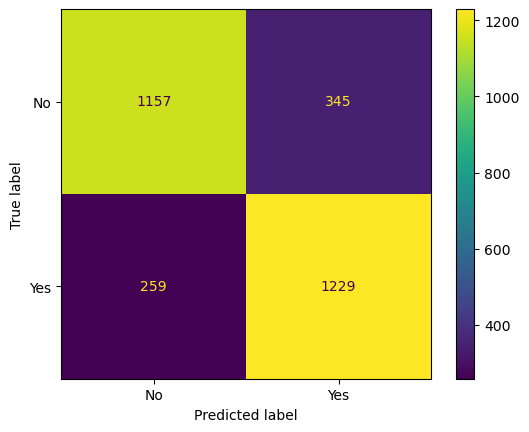

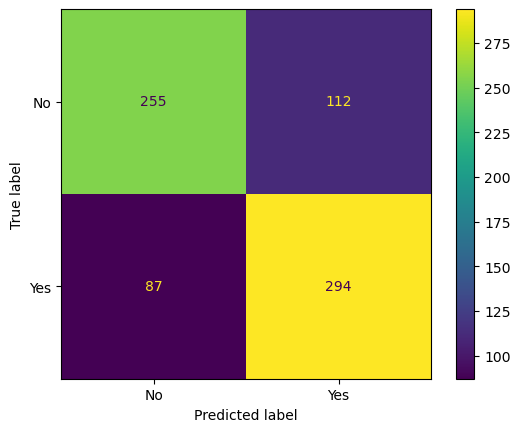

In [134]:
print(ConfusionMatrixDisplay.from_predictions(train_y,train_pred),ConfusionMatrixDisplay.from_predictions(test_y,test_pred))

In [129]:
print(classification_report(train_y,train_pred),classification_report(test_y,test_pred))

              precision    recall  f1-score   support

          No       0.82      0.77      0.79      1502
         Yes       0.78      0.83      0.80      1488

    accuracy                           0.80      2990
   macro avg       0.80      0.80      0.80      2990
weighted avg       0.80      0.80      0.80      2990
               precision    recall  f1-score   support

          No       0.75      0.69      0.72       367
         Yes       0.72      0.77      0.75       381

    accuracy                           0.73       748
   macro avg       0.73      0.73      0.73       748
weighted avg       0.73      0.73      0.73       748



In [130]:
print(accuracy_score(train_y,train_pred),accuracy_score(test_y,test_pred))

0.7979933110367893 0.733957219251337


In [72]:
#print(log_loss(train_y,train_pred),log_loss(test_y,test_pred))
#ValueError: could not convert string to float: 'No'

# Best Model Selection

In [180]:
models = {
 'Logistic' :LogisticRegression(),
 'KNN' :KNeighborsClassifier(),
 'Decision' :DecisionTreeClassifier(),
 'RandomForest' :RandomForestClassifier(),
 'AdaBoost': AdaBoostClassifier(),
 'GradientBoost' : GradientBoostingClassifier(),
 'Voting': VotingClassifier(estimators = [('Decision' ,DecisionTreeClassifier(splitter = 'random', 
min_samples_split = 5, max_features = 'sqrt', max_depth = 6, class_weight= 'balanced')),
('AdaBoost', AdaBoostClassifier(n_estimators = 60, learning_rate = 0.5)),
('RandomForest', RandomForestClassifier(n_estimators = 200, min_samples_split = 5,
max_features='sqrt', max_depth= 7))
]), 
 'Stacking': StackingClassifier(estimators = [('Decision' ,DecisionTreeClassifier(splitter = 'random', 
min_samples_split = 5, max_features = 'sqrt', max_depth = 6, class_weight= 'balanced')),
('AdaBoost', AdaBoostClassifier(n_estimators = 60, learning_rate = 0.5)),
('RandomForest', RandomForestClassifier(n_estimators = 200, min_samples_split = 5,
max_features='sqrt', max_depth= 7))
])
}

In [181]:
res = []
for name,model in models.items():
    print("Model : ",name)
    Package = Pipeline([
    ('Preprocessing',Final_preprocessing),
    ('Poly',PolynomialFeatures(degree=2)),
    ('model',model)
])
    # Params Declaration:
    Logistic_params = {
    'model__penalty' : ['l2','l1','elasticnet'],
    'model__class_weight' :['balanced','None'],
    'model__solver' : ['liblinear','newton-cholesky']
}
    KNN_params = {
    'model__n_neighbors' : [5,7,3,1],
    #[i for i in range(50)],
    'model__algorithm' :['auto','kd_tree','ball_tree'],
    'model__weights' : ['uniform', 'distance','None']
    #'model__leaf_size' :[10,15,20,25,30,45],
    #'model__p':[2,3],
    #'model__metric' : ['minkowski','Manhattan'],
    #'model__n_jobs' : [1,2]
}
    Decision_params = {
    'model__splitter' : ["best", "random"],
    'model__max_depth': [3,4,5,6,7],
    'model__min_samples_split': [2,3,5],
    'model__max_features': ["auto", "sqrt"],
    'model__class_weight' :['balanced']
}
    RF_params = {
    'model__n_estimators' : [100,150,200],
    'model__max_depth' : [3,4,5,6,7],
    'model__min_samples_split': [2,3,5],
    'model__max_features': ["auto", "sqrt"]
}
    Ada_params = {
    'model__n_estimators' : [50,60,70,80],
    'model__learning_rate' : [0.5,0.6,0.8,1]
}
    GradB_params = {
    'model__learning_rate':[0.1,0.3,0.5],
    'model__n_estimators': [100,50,70],
    'model__max_depth': [2,3,4,5]
}
    Voting_params = {
    'model__voting' : ['hard','soft']
}
    Stacking_params = {
    'model__final_estimator': [KNeighborsClassifier(weights='uniform', n_neighbors= 7, algorithm='auto'),
                               LogisticRegression(solver= 'liblinear', penalty= 'l1', class_weight= 'balanced')]
}
    # Mapping Parameter to respective Model:
    def param_select():
        if (name == 'Logistic'):
            param = Logistic_params
        elif (name == 'KNN'):
            param = KNN_params
        elif (name == 'Decision'):
            param = Decision_params
        elif (name == 'RandomForest'):
            param = RF_params
        elif (name == 'AdaBoost'):
            param = Ada_params
        elif (name == 'GradientBoost'):
            param = GradB_params
        elif (name == 'Voting'):
            param = Voting_params    
        elif (name == 'Stacking'):
            param = Stacking_params    
        return param     
    
    # Model Fitting:
    grid = RandomizedSearchCV(estimator= Package,param_distributions=param_select(),scoring='roc_auc',cv = 5)
    grid.fit(train_x,train_y)    
    # Model Prediction:
    y_predict_train = grid.predict(train_x)
    y_predict_test  = grid.predict(test_x)    
    # Best Param Finding:
    best = grid.best_params_
    print('Best Params for {} model is {}'.format(name,best))    
    # Train, Test Accuracy comparision:
    train_accuracy  = accuracy_score(train_y,y_predict_train)
    test_accuracy   = accuracy_score(test_y,y_predict_test)
    print("Train Accuracy",train_accuracy)
    print("Test Accuracy",test_accuracy)    
    # Appending result to variable for future reference:
    res.append([name,train_accuracy,test_accuracy])
    

Model :  Logistic
Best Params for Logistic model is {'model__solver': 'liblinear', 'model__penalty': 'l1', 'model__class_weight': 'balanced'}
Train Accuracy 0.7963210702341137
Test Accuracy 0.7379679144385026
Model :  KNN
Best Params for KNN model is {'model__weights': 'uniform', 'model__n_neighbors': 7, 'model__algorithm': 'auto'}
Train Accuracy 0.7949832775919733
Test Accuracy 0.7272727272727273
Model :  Decision
Best Params for Decision model is {'model__splitter': 'random', 'model__min_samples_split': 2, 'model__max_features': 'auto', 'model__max_depth': 5, 'model__class_weight': 'balanced'}
Train Accuracy 0.757190635451505
Test Accuracy 0.7593582887700535
Model :  RandomForest
Best Params for RandomForest model is {'model__n_estimators': 100, 'model__min_samples_split': 3, 'model__max_features': 'sqrt', 'model__max_depth': 6}
Train Accuracy 0.8160535117056856
Test Accuracy 0.7566844919786097
Model :  AdaBoost
Best Params for AdaBoost model is {'model__n_estimators': 60, 'model__le

In [191]:
res = pd.DataFrame(res,columns = ['Model','TrainScore','TestScore'])
res['Variation'] = res['TrainScore']-res['TestScore']
res.sort_values(['Variation'])

,Model,TrainScore,TestScore,Variation
2,Decision,0.757191,0.759358,-0.002168
4,AdaBoost,0.794314,0.740642,0.053673
6,Voting,0.805017,0.747326,0.057691
0,Logistic,0.796321,0.737968,0.058353
3,RandomForest,0.816054,0.756684,0.059369
1,KNN,0.794983,0.727273,0.067711
5,GradientBoost,0.822408,0.744652,0.077756
7,Stacking,0.844147,0.760695,0.083452


In [ ]:
# Elbow Chart for KNN - Best Neighbour Finding !

In [161]:
res = []
for i in range(1,50):
    Package = Pipeline([
    ('Preprocessing',Final_preprocessing),
    ('Poly',PolynomialFeatures(degree=2)),
    ('model',KNeighborsClassifier(n_neighbors = i))
])
    Package.fit(train_x,train_y) 
    predict_y = Package.predict(train_x)
    res.append(accuracy_score(train_y,predict_y))

<Axes: >

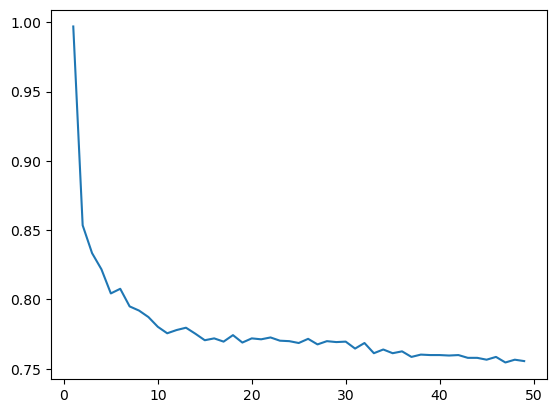

In [163]:
pd.Series(res,index = range(1,50)).plot()